In [1]:
import pandas as pd
import numpy as np

In [2]:
quick_release = pd.read_csv("/work/QRV Bill of Materials.csv", encoding='windows-1252')

quick_release

Level                                                Key        System  \
0          1                                         EV00004608          BODY   
1          2                              EV00004608-SY00002272          BODY   
2          3                   EV00004608-SY00002272-SB00007686          BODY   
3          4        EV00004608-SY00002272-SB00007686-GP00005889          BODY   
4          5  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...      ...                                                ...           ...   
69380      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69381      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69382      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69383      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69384      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

       Subsystem  Part Number                     Part Title      Parent  \
0            NaN   EV00004608                     QR Vehicle         NaN   
1            NaN   SY00002272                           BODY  EV00004608   
2      STRUCTURE   SB00007686                      STRUCTURE  SY00002272   
3      STRUCTURE   GP00005889                          SEALS  SB00007686   
4      STRUCTURE  CAY00010323             BODY STORE SEALANT  GP00005889   
...          ...          ...                            ...         ...   
69380    BATTERY   SC00013805                      Foam 607P  PT01597040   
69381    BATTERY   PT01759813  TOUCH COVER; NEGATIVE - LARGE  PT01759805   
69382    BATTERY   PT01759815  TOUCH COVER; POSITIVE - LARGE  PT01759805   
69383    BATTERY   PT00052426              SHEAR WALL; 3BOLT  PT01759805   
69384    BATTERY   PT00052426              SHEAR WALL; 3BOLT  PT01759805   

      Responsible Engineer Procurement Code Sub Component Code  \
0             Rachel Green          Phantom                NaN   
1             Rachel Green          Phantom                NaN   
2             Rachel Green          Phantom                NaN   
3             Rachel Green          Phantom                NaN   
4            Pheobe Buffay          Phantom                NaN   
...                    ...              ...                ...   
69380       Duke Weaselton              Buy                NaN   
69381              Swagman             Make                NaN   
69382              Swagman              Buy                NaN   
69383           Judy Hopps              Buy                NaN   
69384           Judy Hopps              Buy                NaN   

                                           Variant  
0                             QRV: Car Type{Venti}  
1                             QRV: Car Type{Venti}  
2                             QRV: Car Type{Venti}  
3                             QRV: Car Type{Venti}  
4                             QRV: Car Type{Venti}  
...                                            ...  
69380  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69381  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69382  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69383  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69384  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[69385 rows x 11 columns]

In [3]:
quick_release[quick_release['Level'] == 2]

Level                    Key               System Subsystem  \
1          2  EV00004608-SY00002272                 BODY       NaN   
16841      2  EV00004608-SY00001626              CHASSIS       NaN   
18150      2  EV00004608-SY00002460             INTERIOR       NaN   
21617      2  EV00004608-SY00001727         MITOCHONDRIA       NaN   
21984      2  EV00004608-SY00005795         BATTERY PACK       NaN   
21995      2  EV00004608-SY00004838            AUTOPILOT       NaN   
22028      2  EV00004608-SY00010015  TEMPERATURE CONTROL       NaN   
22458      2  EV00004608-SY00007705             CATALYST       NaN   
22461      2  EV00004608-SY00001962             ELECTRIC       NaN   

      Part Number           Part Title      Parent Responsible Engineer  \
1      SY00002272                 BODY  EV00004608         Rachel Green   
16841  SY00001626              CHASSIS  EV00004608         Rachel Green   
18150  SY00002460             INTERIOR  EV00004608         Rachel Green   
21617  SY00001727         MITOCHONDRIA  EV00004608         Rachel Green   
21984  SY00005795         BATTERY PACK  EV00004608         Rachel Green   
21995  SY00004838            AUTOPILOT  EV00004608         Rachel Green   
22028  SY00010015  TEMPERATURE CONTROL  EV00004608         Rachel Green   
22458  SY00007705             CATALYST  EV00004608         Rachel Green   
22461  SY00001962             ELECTRIC  EV00004608         Rachel Green   

      Procurement Code Sub Component Code  \
1              Phantom                NaN   
16841          Phantom                NaN   
18150          Phantom                NaN   
21617          Phantom                NaN   
21984          Phantom                NaN   
21995          Phantom                NaN   
22028          Phantom                NaN   
22458          Phantom                NaN   
22461          Phantom                NaN   

                                                 Variant  
1                                   QRV: Car Type{Venti}  
16841                              QRV: Car Type{Grande}  
18150   QRV: Handed Drive{LHD } AND Car Type{Venti,Tall}  
21617  QRV: Car Type{Grande} AND Motors{Accord Dual-m...  
21984  QRV: Battery{LMAO 5 Module} AND Wheel Drive{Fr...  
21995                                                     
22028                          QRV: Car Type{Tall,Venti}  
22458                                                     
22461       QRV: Car Type{Grande} AND Handed Drive{LHD }

In [4]:
quick_release[quick_release['Level'] == 2]["Sub Component Code"].iloc[0]

nan

In [5]:
count=0
for index, row in quick_release.iterrows():
    if pd.isnull(row["Sub Component Code"]):
        count+=1
        # print("should be nan")
print(count)

59833


In [6]:
from collections import defaultdict
rules = {
    'Buy-Blank': {'Buy-Consignement Buy', 'Buy-Directed Buy', 'Buy-Supplier Buy', 'Phantom'},
    'Make, Phantom': {'Buy-Blank', 'Make', 'Phantom'},
    'Buy-Directed Buy, Buy-Consignment Buy': {'Buy-Directed Buy', 'Buy-Supplier Buy', 'Phantom'},
    'Buy-Supplier Buy': {'Buy-Supplier Buy', 'Phantom'}
}

rules2 = {'Buy-Blank': ['Buy-Consignment', 'Buy-DirectedBuy', 'Buy-SupplierBuy', 'Phantom-Blank'],
            'Make-Blank': ['Buy-Blank', 'Make-Blank', 'Phantom-Blank'],
            'Phantom-Blank': ['Buy-Blank', 'Make-Blank', 'Phantom-Blank'],
            'Buy-DirectedBuy': ['Buy-DirectedBuy', 'Buy-SupplierBuy', 'Phantom-Blank'], 
            'Buy-Consignment': ['Buy-DirectedBuy', 'Buy-SupplierBuy', 'Phantom-Blank'], 
            'Buy-SupplierBuy': ['Buy-SupplierBuy', 'Phantom-Blank']}

def check_valid(df_parent, df_child):
    to_return = defaultdict(list)
    for index_c, row_c in df_child.iterrows():
        for index_p, row_p in df_parent.iterrows():
            if row_p['Part Number'] == row_c['Parent']:
                if pd.isnull(row_p['Sub Component Code']):
                    key_p = str(row_p['Procurement Code']) + ("-") + "Blank"
                else: 
                    key_p = str(row_p['Procurement Code'])+"-"+str(row_p['Sub Component Code'])
                if pd.isnull(row_c['Sub Component Code']):
                    key_c = str(row_c['Procurement Code']) + ("-") + "Blank"
                else: 
                    key_c = str(row_c['Procurement Code'])+"-"+str(row_c['Sub Component Code'])
                if key_c in rules2[key_p]:
                    to_return[row_p['Key']].append(row_c['Key'])
    return to_return

In [7]:
df_19 = _deepnote_execute_sql('SELECT *\nFROM quick_release qr\nWHERE qr.Parent = \'PT00015718\'\n-- WHERE qr.Key = \'EV00004608-SY00002272-SB00007686-GP00005889-CAY00010323-PT00015718\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_19

Level                                                Key System  Subsystem  \
0      7  EV00004608-SY00002272-SB00007686-GP00005889-CA...   BODY  STRUCTURE   
1      8  EV00004608-SY00002272-SB00007686-GP00002274-CA...   BODY  STRUCTURE   

  Part Number                     Part Title      Parent Responsible Engineer  \
0  PT00023597  PUMPABLE SEALER UNDERBODY CAB  PT00015718        Monica Geller   
1  PT00013587      INNER LOWER FRONT B PANEL  PT00015718        Rubeus Hagrid   

  Procurement Code Sub Component Code  \
0          Phantom               None   
1              Buy        SupplierBuy   

                                        Variant  
0                          QRV: Car Type{Venti}  
1  QRV: Handed Drive{RHD } AND Car Type{Grande}

In [8]:
# print(tree.get_node('EV00004608-SY00002272-SB00007686-GP00005889-CAY00010323-PT00015718-PT00023597-SC00012818'.lower()).data.count)

In [9]:
# print(tree.subtree('EV00004608-SY00002272-SB00007686-GP00002274-CAY00007737'.lower()))

In [10]:
def preprocess_df(df):
    # Create a new 'key' column, handling NaN values for 'Sub Component Code'
    df['key'] = df['Procurement Code'] + "-" + df['Sub Component Code'].fillna("Blank")
    return df

def check_valid(df_parent, df_child):
    # Preprocess DataFrames to add 'key' columns
    df_parent = preprocess_df(df_parent.copy())
    df_child = preprocess_df(df_child.copy())
    
    # Merge parent and child DataFrames on the part number relationships
    merged_df = df_child.merge(df_parent, left_on='Parent', right_on='Part Number', suffixes=('_child', '_parent'))
    # Create a dictionary to accumulate valid relationships
    valid_relationships = defaultdict(list)
    
    # Iterate through merged DataFrame rows to validate each relationship
    for _, row in merged_df.iterrows():
        # Check if child's key is allowed under parent's key according to rules2
        # rules
        if row['key_child'] in rules2.get(row['key_parent'], []):

            # keys
            valid_relationships[row['Key_parent']].append(row['Key_child'])

    print(merged_df.shape)
    return valid_relationships

In [11]:
class Count:
    def __init__(self, count=0):
        self.count = count

    def increment(self):
        self.count += 1

from treelib import Tree, Node

tree = Tree()
tree.create_node('EV00004608', 'ev00004608', data=Count(1))
global count
count = 0

global n_count
n_count = 0

def update_tree_with_node(tree, node_id, parent_id):
    node = tree.get_node(node_id)
    global count
    global n_count 
    if node:
        node.data.increment()
    else:
        if tree.contains(parent_id):  # Ensure the parent node exists
            tree.create_node(node_id.split('-')[-1], node_id, parent=parent_id, data=Count(1))
            count += 1

for i in range(2, 13):

    parent_df = quick_release[quick_release['Level'] == i-1]
    child_df = quick_release[quick_release['Level'] == i]
    part_num = check_valid(parent_df, child_df)

    for key, val in part_num.items():
        for whole_key in val:
            update_tree_with_node(tree, whole_key.lower(), key.lower())
    
    #print(part_num)

#print(tree)

ModuleNotFoundError: No module named 'treelib'

In [ ]:
total_count = 0
for node in tree.all_nodes_itr():  # Iterate through all nodes in the tree
    if node.data:  # Check if the node has data attribute
        total_count += node.data.count  # Add the count from the node's data

print(total_count)

NameError: name 'tree' is not defined

In [ ]:
DeepnoteChart(quick_release, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Procurement Code"},"y":{"sort":null,"scale":{"type":"linear"},"aggregate":"count"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]}}}""")

In [ ]:
quick_release

Level                                                Key        System  \
0          1                                         EV00004608          BODY   
1          2                              EV00004608-SY00002272          BODY   
2          3                   EV00004608-SY00002272-SB00007686          BODY   
3          4        EV00004608-SY00002272-SB00007686-GP00005889          BODY   
4          5  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...      ...                                                ...           ...   
69380      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69381      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69382      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69383      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69384      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

       Subsystem  Part Number                     Part Title      Parent  \
0            NaN   EV00004608                     QR Vehicle         NaN   
1            NaN   SY00002272                           BODY  EV00004608   
2      STRUCTURE   SB00007686                      STRUCTURE  SY00002272   
3      STRUCTURE   GP00005889                          SEALS  SB00007686   
4      STRUCTURE  CAY00010323             BODY STORE SEALANT  GP00005889   
...          ...          ...                            ...         ...   
69380    BATTERY   SC00013805                      Foam 607P  PT01597040   
69381    BATTERY   PT01759813  TOUCH COVER; NEGATIVE - LARGE  PT01759805   
69382    BATTERY   PT01759815  TOUCH COVER; POSITIVE - LARGE  PT01759805   
69383    BATTERY   PT00052426              SHEAR WALL; 3BOLT  PT01759805   
69384    BATTERY   PT00052426              SHEAR WALL; 3BOLT  PT01759805   

      Responsible Engineer Procurement Code Sub Component Code  \
0             Rachel Green          Phantom                NaN   
1             Rachel Green          Phantom                NaN   
2             Rachel Green          Phantom                NaN   
3             Rachel Green          Phantom                NaN   
4            Pheobe Buffay          Phantom                NaN   
...                    ...              ...                ...   
69380       Duke Weaselton              Buy                NaN   
69381              Swagman             Make                NaN   
69382              Swagman              Buy                NaN   
69383           Judy Hopps              Buy                NaN   
69384           Judy Hopps              Buy                NaN   

                                           Variant  
0                             QRV: Car Type{Venti}  
1                             QRV: Car Type{Venti}  
2                             QRV: Car Type{Venti}  
3                             QRV: Car Type{Venti}  
4                             QRV: Car Type{Venti}  
...                                            ...  
69380  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69381  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69382  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69383  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69384  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[69385 rows x 11 columns]

In [ ]:
quick_release.shape

(69385, 11)

In [ ]:
any(pd.isna(quick_release['Procurement Code']))


True

In [ ]:
any(pd.isna(quick_release['Variant']))

True

In [ ]:
character = quick_release['Variant'].iloc[306]  
print(character == "�")

False


In [ ]:
character = quick_release['Subsystem'].iloc[0]  
print(type(character))

print(type(np.nan))

<class 'float'>
<class 'float'>


# Procurement Rule #1

In [ ]:
df_31 = _deepnote_execute_sql('--Table with rows that are valid given Procurement Combinations Rule #1\nDROP TABLE IF EXISTS valid_rule1;\nCREATE TABLE valid_rule1 AS\nSELECT *\nFROM quick_release as qr_c\nWHERE qr_c."Parent" IN \n(\n    SELECT qr_p."Part Number"\n    FROM quick_release as qr_p\n    WHERE qr_p."Procurement Code" = \'Buy\' AND qr_p."Sub Component Code" IS NULL\n) \nAND \n((qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'Consignment\') OR \n(qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'DirectedBuy\') OR \n(qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'SupplierBuy\') OR \n(qr_c."Procurement Code" = \'Phantom\' AND qr_c."Sub Component Code" IS NULL))', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_31

Count
0   5898

In [ ]:
df_32 = _deepnote_execute_sql('--Table with rows that are error given Procurement Combinations Rule #1\nDROP TABLE IF EXISTS error_rule1;\nCREATE TABLE error_rule1 AS\nSELECT *\nFROM quick_release as qr_c\nWHERE qr_c."Parent" IN \n(\n    SELECT qr_p."Part Number"\n    FROM quick_release as qr_p\n    WHERE qr_p."Procurement Code" = \'Buy\' AND qr_p."Sub Component Code" IS NULL\n) \nAND NOT \n((qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'Consignment\') OR \n(qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'DirectedBuy\') OR \n(qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'SupplierBuy\') OR \n(qr_c."Procurement Code" = \'Phantom\' AND qr_c."Sub Component Code" IS NULL))', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_32

Count
0    825

In [ ]:
df_55 = _deepnote_execute_sql('--checking total childs that have rule1 listed as parent\nSELECT *\nFROM quick_release as qr_c\nWHERE qr_c."Parent" IN \n(\n    SELECT qr_p."Part Number"\n    FROM quick_release as qr_p\n    WHERE qr_p."Procurement Code" = \'Buy\' AND qr_p."Sub Component Code" IS NULL\n) ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_55

Level                                                Key        System  \
0         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
1         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
2         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
3         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
4         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...     ...                                                ...           ...   
9150      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
9151      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
9152      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
9153      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
9154      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

      Subsystem Part Number                               Part Title  \
0     STRUCTURE  SC00012818                    Adhesive Paste Type G   
1     STRUCTURE  SC00012818                    Adhesive Paste Type G   
2     STRUCTURE  SC00012818                    Adhesive Paste Type G   
3     STRUCTURE  SC00012818                    Adhesive Paste Type G   
4     STRUCTURE  SC00012818                    Adhesive Paste Type G   
...         ...         ...                                      ...   
9150    BATTERY  PT00067251                                Microwave   
9151    BATTERY  PT00067251                                Microwave   
9152    BATTERY  PT00067251                                Microwave   
9153    BATTERY  PT00067251                                Microwave   
9154    BATTERY  PT00056246  CONNECTOR; THERMISTOR HARNESS; MOLECULE   

          Parent Responsible Engineer Procurement Code Sub Component Code  \
0     PT00021866          Ross Geller              Buy               None   
1     PT00021866          Ross Geller              Buy               None   
2     PT00021866          Ross Geller              Buy               None   
3     PT00021866          Ross Geller              Buy               None   
4     PT00021866          Ross Geller              Buy               None   
...          ...                  ...              ...                ...   
9150  PT00056245          Jack Horner              Buy        DirectedBuy   
9151  PT00056245          Jack Horner              Buy        DirectedBuy   
9152  PT00056245          Jack Horner              Buy        DirectedBuy   
9153  PT00056245          Jack Horner              Buy        DirectedBuy   
9154  PT00056245          Jack Horner              Buy               None   

                                          Variant  
0                            QRV: Car Type{Venti}  
1                            QRV: Car Type{Venti}  
2                            QRV: Car Type{Venti}  
3                            QRV: Car Type{Venti}  
4                            QRV: Car Type{Venti}  
...                                           ...  
9150  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
9151  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
9152  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
9153  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
9154  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[9155 rows x 11 columns]

# Procurement Rule #2

In [ ]:
df_34 = _deepnote_execute_sql('--valids\nDROP TABLE IF EXISTS valid_rule2;\nCREATE TABLE valid_rule2 AS\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE (qr."Sub Component Code" IS NULL AND qr."Procurement Code" == \'Make\') \n    OR \n    (qr."Sub Component Code" IS NULL AND qr."Procurement Code" == \'Phantom\')) \nAND \n((qr."Procurement Code" == \'Buy\' AND qr."Sub Component Code" IS NULL) OR \n(qr."Procurement Code" == \'Make\' AND qr."Sub Component Code" IS NULL) OR \n(qr."Procurement Code" == \'Phantom\' AND qr."Sub Component Code" IS NULL));', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_34

Count
0  55649

In [ ]:
df_36 = _deepnote_execute_sql('--error\nDROP TABLE IF EXISTS error_rule2;\nCREATE TABLE error_rule2 AS\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE (qr."Sub Component Code" IS NULL AND qr."Procurement Code" = \'Make\') \n    OR \n    (qr."Sub Component Code" IS NULL AND qr."Procurement Code" = \'Phantom\')) \nAND NOT\n((qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" IS NULL) OR \n(qr."Procurement Code" = \'Make\' AND qr."Sub Component Code" IS NULL) OR \n(qr."Procurement Code" = \'Phantom\' AND qr."Sub Component Code" IS NULL));', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_36

Count
0    778

In [ ]:
df_54 = _deepnote_execute_sql('--totaling\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE (qr."Sub Component Code" IS NULL AND qr."Procurement Code" == \'Make\') \n    OR \n    (qr."Sub Component Code" IS NULL AND qr."Procurement Code" == \'Phantom\')) ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_54

Level                                                Key        System  \
0          2                              EV00004608-SY00002272          BODY   
1          3                   EV00004608-SY00002272-SB00007686          BODY   
2          4        EV00004608-SY00002272-SB00007686-GP00005889          BODY   
3          5  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
4          6  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...      ...                                                ...           ...   
56424      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
56425      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
56426      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
56427      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
56428      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

       Subsystem  Part Number                     Part Title       Parent  \
0           None   SY00002272                           BODY   EV00004608   
1      STRUCTURE   SB00007686                      STRUCTURE   SY00002272   
2      STRUCTURE   GP00005889                          SEALS   SB00007686   
3      STRUCTURE  CAY00010323             BODY STORE SEALANT   GP00005889   
4      STRUCTURE   PT00015718         SEALER - UNDERBODY CAB  CAY00010323   
...          ...          ...                            ...          ...   
56424    BATTERY   SC00013805                      Foam 607P   PT01597040   
56425    BATTERY   PT01759813  TOUCH COVER; NEGATIVE - LARGE   PT01759805   
56426    BATTERY   PT01759815  TOUCH COVER; POSITIVE - LARGE   PT01759805   
56427    BATTERY   PT00052426              SHEAR WALL; 3BOLT   PT01759805   
56428    BATTERY   PT00052426              SHEAR WALL; 3BOLT   PT01759805   

      Responsible Engineer Procurement Code Sub Component Code  \
0             Rachel Green          Phantom               None   
1             Rachel Green          Phantom               None   
2             Rachel Green          Phantom               None   
3            Pheobe Buffay          Phantom               None   
4            Pheobe Buffay          Phantom               None   
...                    ...              ...                ...   
56424       Duke Weaselton              Buy               None   
56425              Swagman             Make               None   
56426              Swagman              Buy               None   
56427           Judy Hopps              Buy               None   
56428           Judy Hopps              Buy               None   

                                           Variant  
0                             QRV: Car Type{Venti}  
1                             QRV: Car Type{Venti}  
2                             QRV: Car Type{Venti}  
3                             QRV: Car Type{Venti}  
4                             QRV: Car Type{Venti}  
...                                            ...  
56424  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
56425  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
56426  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
56427  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
56428  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[56429 rows x 11 columns]

# Procurement Rule #3

In [ ]:
df_39 = _deepnote_execute_sql('--valids\nDROP TABLE IF EXISTS valid_rule3;\nCREATE TABLE valid_rule3 AS\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE qr."Sub Component Code" = \'DirectedBuy\' AND qr."Procurement Code" = \'Buy\' OR \n    qr."Sub Component Code" = \'Consignment\' AND qr."Procurement Code" = \'Buy\') \nAND \n((qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'DirectedBuy\') OR \n(qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'SupplierBuy\') OR \n(qr."Procurement Code" = \'Phantom\' AND qr."Sub Component Code" IS NULL));\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_39

Count
0    490

In [ ]:
df_40 = _deepnote_execute_sql('--error\nDROP TABLE IF EXISTS error_rule3;\nCREATE TABLE error_rule3 AS\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE qr."Sub Component Code" = \'DirectedBuy\' AND qr."Procurement Code" = \'Buy\' OR \n    qr."Sub Component Code" = \'Consignment\' AND qr."Procurement Code" = \'Buy\') \nAND NOT\n((qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'DirectedBuy\') OR \n(qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'SupplierBuy\') OR \n(qr."Procurement Code" = \'Phantom\' AND qr."Sub Component Code" IS NULL));\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_40

Count
0     49

In [ ]:
df_56 = _deepnote_execute_sql('--totaling\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE qr."Sub Component Code" = \'DirectedBuy\' AND qr."Procurement Code" = \'Buy\' OR \n    qr."Sub Component Code" = \'Consignment\' AND qr."Procurement Code" = \'Buy\') ', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_56

Level                                                Key        System  \
0        8  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
1        8  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
2        8  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
3        8  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
4        8  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
..     ...                                                ...           ...   
609     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
610     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
611     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
612     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
613     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

     Subsystem Part Number             Part Title      Parent  \
0    STRUCTURE  PT00092228        AWESOME_BRACKET  PT00092226   
1    STRUCTURE  SC00000560  Welded Nut 6MM Type A  PT00092226   
2    STRUCTURE  PT00092228        AWESOME_BRACKET  PT00092226   
3    STRUCTURE  SC00000560  Welded Nut 6MM Type A  PT00092226   
4    STRUCTURE  PT00092228        AWESOME_BRACKET  PT00092226   
..         ...         ...                    ...         ...   
609    BATTERY  PT00067753    PCB - BTS; ESS; OMG  PT00016063   
610    BATTERY  PT00067753    PCB - BTS; ESS; OMG  PT00016063   
611    BATTERY  PT00067753    PCB - BTS; ESS; OMG  PT00016063   
612    BATTERY  PT00067753    PCB - BTS; ESS; OMG  PT00016063   
613    BATTERY  PT00067753    PCB - BTS; ESS; OMG  PT00016063   

    Responsible Engineer Procurement Code Sub Component Code  \
0          Pheobe Buffay              Buy        SupplierBuy   
1           Lisa Simpson             Make               None   
2          Pheobe Buffay              Buy        SupplierBuy   
3           Lisa Simpson             Make               None   
4          Pheobe Buffay              Buy        SupplierBuy   
..                   ...              ...                ...   
609      Brittany Pierce              Buy        SupplierBuy   
610      Brittany Pierce              Buy        SupplierBuy   
611      Brittany Pierce              Buy        SupplierBuy   
612      Brittany Pierce              Buy        SupplierBuy   
613      Brittany Pierce              Buy        SupplierBuy   

                                         Variant  
0                                                 
1                                                 
2                          QRV: Car Type{Grande}  
3                          QRV: Car Type{Grande}  
4                      QRV: Car Type{Venti,Tall}  
..                                           ...  
609  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
610  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
611  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
612  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
613  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[614 rows x 11 columns]

# Procurement Rule #4

In [ ]:
df_41 = _deepnote_execute_sql('--valids\nDROP TABLE IF EXISTS valid_rule4;\nCREATE TABLE valid_rule4 AS\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE qr."Sub Component Code" = \'SupplierBuy\' AND qr."Procurement Code" = \'Buy\') \nAND \n((qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'SupplierBuy\') OR \n(qr."Procurement Code" = \'Phantom\' AND qr."Sub Component Code" IS NULL));\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_41

Count
0   1760

In [ ]:
df_42 = _deepnote_execute_sql('DROP TABLE IF EXISTS error_rule4;\nCREATE TABLE error_rule4 AS\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE qr."Sub Component Code" = \'SupplierBuy\' AND qr."Procurement Code" = \'Buy\') \nAND NOT\n((qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'SupplierBuy\') OR \n(qr."Procurement Code" = \'Phantom\' AND qr."Sub Component Code" IS NULL));\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_42

Count
0    494

In [ ]:
df_57 = _deepnote_execute_sql('--alvin totaling adds up to 68,893, this is same as row count\nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" IN (\n    SELECT qr."Part Number"\n    FROM quick_release as qr\n    WHERE qr."Sub Component Code" = \'SupplierBuy\' AND qr."Procurement Code" = \'Buy\') \n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_57

Level                                                Key        System  \
0         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
1         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
2         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
3         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
4         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...     ...                                                ...           ...   
2690     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
2691     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
2692     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
2693     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
2694     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

      Subsystem Part Number          Part Title      Parent  \
0     STRUCTURE  SC00012821   Adhesive Type D23  PT00025488   
1     STRUCTURE  SC00012821   Adhesive Type D23  PT00025488   
2     STRUCTURE  SC00012821   Adhesive Type D23  PT00025488   
3     STRUCTURE  SC00012821   Adhesive Type D23  PT00025488   
4     STRUCTURE  SC00012821   Adhesive Type D23  PT00025488   
...         ...         ...                 ...         ...   
2690    BATTERY  PT00051315  Sour Patch Gummies  PT00015983   
2691    BATTERY  PT00051311      Motorboat Tail  PT00015975   
2692    BATTERY  PT00051315  Sour Patch Gummies  PT00015983   
2693    BATTERY  PT00051311      Motorboat Tail  PT00015975   
2694    BATTERY  PT00051310     Charge Port BCA  PT00015978   

     Responsible Engineer Procurement Code Sub Component Code  \
0             Ross Geller              Buy               None   
1             Ross Geller              Buy               None   
2             Ross Geller              Buy               None   
3             Ross Geller              Buy               None   
4             Ross Geller              Buy               None   
...                   ...              ...                ...   
2690      Dawn Bellwether              Buy        SupplierBuy   
2691      Dawn Bellwether              Buy        SupplierBuy   
2692      Dawn Bellwether              Buy        SupplierBuy   
2693      Dawn Bellwether              Buy        SupplierBuy   
2694           Chief Bogo              Buy        DirectedBuy   

                                          Variant  
0                            QRV: Car Type{Venti}  
1                            QRV: Car Type{Venti}  
2                            QRV: Car Type{Venti}  
3                            QRV: Car Type{Venti}  
4                            QRV: Car Type{Venti}  
...                                           ...  
2690  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
2691  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
2692  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
2693  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
2694  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[2695 rows x 11 columns]

# Adding "Is Valid" Column for Future Analysis

In [ ]:
df_61 = _deepnote_execute_sql('--saving error table copy for later use\nDROP TABLE IF EXISTS error1;\nCREATE TABLE error1 AS\nSELECT * FROM error_rule1;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_61

Count
0    825

In [ ]:
df_62 = _deepnote_execute_sql('DROP TABLE IF EXISTS error2;\nCREATE TABLE error2 AS\nSELECT * FROM error_rule2;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_62

Count
0    778

In [ ]:
df_63 = _deepnote_execute_sql('DROP TABLE IF EXISTS error3;\nCREATE TABLE error3 AS\nSELECT * FROM error_rule3;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_63

Count
0     49

In [ ]:
df_64 = _deepnote_execute_sql('DROP TABLE IF EXISTS error4;\nCREATE TABLE error4 AS\nSELECT * FROM error_rule4;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_64

Count
0    494

In [ ]:
df_43 = _deepnote_execute_sql('--Adding "IS VALID" for ML use\nALTER TABLE valid_rule1\nADD COLUMN "IS VALID" INT\nDEFAULT 1;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_43

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_33 = _deepnote_execute_sql('--Adding "IS NOT VALID"\nALTER TABLE error_rule1\nADD COLUMN "IS VALID" INT\nDEFAULT 0;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_33

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_53 = _deepnote_execute_sql('--Adding "IS VALID"\nALTER TABLE valid_rule2\nADD COLUMN "IS VALID" INT\nDEFAULT 1;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_53

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_44 = _deepnote_execute_sql('--Adding "IS NOT VALID"\nALTER TABLE error_rule2\nADD COLUMN "IS VALID" INT\nDEFAULT 0;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_44

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_45 = _deepnote_execute_sql('ALTER TABLE valid_rule3\nADD COLUMN "IS VALID" INT\nDEFAULT 1;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_45

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_37 = _deepnote_execute_sql('ALTER TABLE error_rule3\nADD COLUMN "IS VALID" INT\nDEFAULT 0;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_37

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_46 = _deepnote_execute_sql('ALTER TABLE valid_rule4\nADD COLUMN "IS VALID" INT\nDEFAULT 1;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_46

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_38 = _deepnote_execute_sql('ALTER TABLE error_rule4\nADD COLUMN "IS VALID" INT\nDEFAULT 0;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_38

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_52 = _deepnote_execute_sql('DROP TABLE IF EXISTS total_rule1;\nCREATE TABLE total_rule1 as\nSELECT * \nFROM valid_rule1\nUNION ALL\nSELECT * \nFROM error_rule1', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_52

Count
0   6723

In [ ]:
df_51 = _deepnote_execute_sql('DROP TABLE IF EXISTS total_rule2;\nCREATE TABLE total_rule2 as\nSELECT * \nFROM valid_rule2\nUNION ALL\nSELECT * \nFROM error_rule2', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_51

Count
0  56427

In [ ]:
df_49 = _deepnote_execute_sql('DROP TABLE IF EXISTS total_rule3;\nCREATE TABLE total_rule3 as\nSELECT * \nFROM valid_rule3\nUNION ALL\nSELECT * \nFROM error_rule3', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_49

Count
0    539

In [ ]:
df_50 = _deepnote_execute_sql('DROP TABLE IF EXISTS total_rule4;\nCREATE TABLE total_rule4 as\nSELECT *\nFROM valid_rule4\nUNION ALL\nSELECT * \nFROM error_rule4', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_50

Count
0   2254

In [ ]:
df_47 = _deepnote_execute_sql('--TOTAL TABLE\nDROP TABLE IF EXISTS all_rule_total;\nCREATE TABLE all_rule_total as\nSELECT * FROM total_rule1\n    UNION ALL\n    SELECT * FROM total_rule2\n    UNION ALL\n    SELECT * FROM total_rule3\n    UNION ALL\n    SELECT * FROM total_rule4', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_47

Count
0  65943

In [ ]:
df_48 = _deepnote_execute_sql('--identify missing values not listed as direct combination compared with raw dataset\nDROP TABLE IF EXISTS rules_combinations;\nCREATE Table rules_combinations as\nSELECT * FROM all_rule_total\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_48

Count
0  65943

In [ ]:
df_58 = _deepnote_execute_sql('ALTER TABLE rules_combinations\nDROP COLUMN "IS VALID"', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_58

Empty DataFrame
Columns: [Success]
Index: []

In [ ]:
df_59 = _deepnote_execute_sql('SELECT * FROM quick_release\nEXCEPT\nSELECT * FROM rules_combinations', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_59

Level                                                Key        System  \
0         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
1         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
2         7  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
3         8  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
4         7  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
...     ...                                                ...           ...   
2200     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
2201      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
2202      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
2203      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
2204      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

      Subsystem Part Number  \
0     STRUCTURE  SC00012238   
1     STRUCTURE  SC00012238   
2     STRUCTURE  SC00010760   
3     STRUCTURE  SC00022468   
4     STRUCTURE  SC00010760   
...         ...         ...   
2200    BATTERY  SC00010830   
2201    BATTERY  PT00089670   
2202    BATTERY  PT00056246   
2203    BATTERY  SC00010831   
2204    BATTERY  SC00010831   

                                             Part Title      Parent  \
0                                 Adhesive Paste Type F  PT00098268   
1                                 Adhesive Paste Type F  PT00098268   
2                                      Bolt 6MM Type G6  PT00018087   
3                                      Bolt 6MM Type H9  PT00024055   
4                                      Bolt 6MM Type G6  PT00021689   
...                                                 ...         ...   
2200                                  Adhesive Type K32  PT01597036   
2201  LABEL - PRODUCT MARKING; PRINT ON DEMAND; 0.62...  PT00022780   
2202            CONNECTOR; THERMISTOR HARNESS; MOLECULE  PT00056245   
2203                                  Adhesive Type K32  PT00094535   
2204                                  Adhesive Type K32  PT00094536   

     Responsible Engineer Procurement Code Sub Component Code  \
0             Ross Geller              Buy               None   
1             Ross Geller              Buy               None   
2            Lisa Simpson              Buy               None   
3            Lisa Simpson              Buy               None   
4            Lisa Simpson              Buy               None   
...                   ...              ...                ...   
2200       Duke Weaselton              Buy               None   
2201       Mercedes Jones              Buy               None   
2202          Jack Horner              Buy               None   
2203       Duke Weaselton              Buy               None   
2204       Duke Weaselton              Buy               None   

                                           Variant  
0     QRV: Car Type{Grande} AND Handed Drive{RHD }  
1                                                   
2                                                   
3                                                   
4                            QRV: Car Type{Grande}  
...                                            ...  
2200   QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
2201   QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
2202   QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
2203   QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
2204   QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[2205 rows x 11 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.DataFrame(all_rule_total)

# Step 3: Splitting Data
X = df.drop('IS VALID', axis=1)  # Features
y = df['IS VALID']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Selection & Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

NameError: name 'all_rule_total' is not defined

# Visualizations

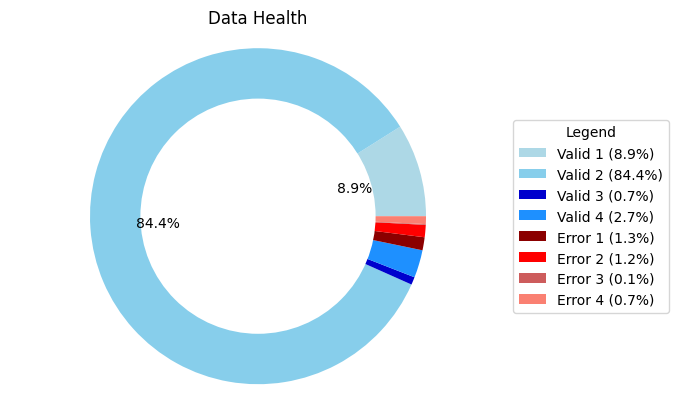

In [ ]:
import matplotlib.pyplot as plt

# Group 1: valid total, Group 2: error total
group1_values = [5898, 55649, 490, 1760]
group2_values = [825, 778, 49, 494]

total_count = sum(group1_values) + sum(group2_values)

group1_percentages = [value / total_count * 100 for value in group1_values]
group2_percentages = [value / total_count * 100 for value in group2_values]

sizes = group1_percentages + group2_percentages
colors = ['lightblue', 'skyblue', 'mediumblue', 'dodgerblue', 'darkred', 'red', 'indianred', 'salmon']

def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct > 5 else ''

plt.pie(sizes, colors=colors, autopct=my_autopct) 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

legend_labels = ['Valid 1 ({:.1f}%)'.format(group1_percentages[0]), 
                 'Valid 2 ({:.1f}%)'.format(group1_percentages[1]), 
                 'Valid 3 ({:.1f}%)'.format(group1_percentages[2]), 
                 'Valid 4 ({:.1f}%)'.format(group1_percentages[3]),
                 'Error 1 ({:.1f}%)'.format(group2_percentages[0]), 
                 'Error 2 ({:.1f}%)'.format(group2_percentages[1]), 
                 'Error 3 ({:.1f}%)'.format(group2_percentages[2]), 
                 'Error 4 ({:.1f}%)'.format(group2_percentages[3])]

plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Legend")

plt.axis('equal')
plt.title('Data Health')
plt.show()

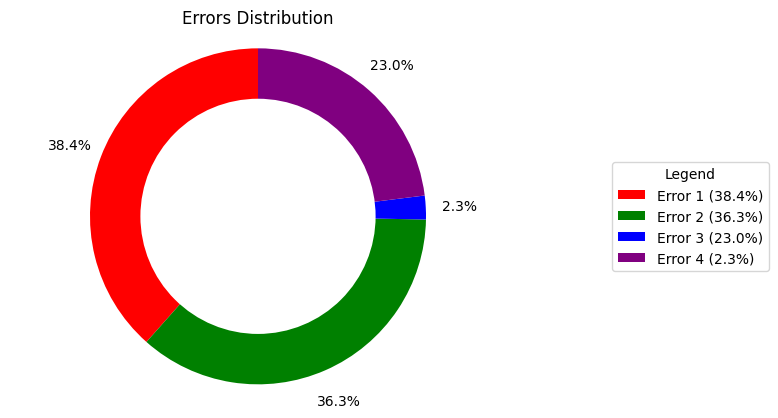

In [ ]:
# Group 2: error total
group2_values = [825, 778, 49, 494]

total_count = sum(group2_values)

group2_percentages = [value / total_count * 100 for value in group2_values]

legend_labels = ['Error 1 ({:.1f}%)'.format(group2_percentages[0]), 
                 'Error 2 ({:.1f}%)'.format(group2_percentages[1]), 
                 'Error 4 ({:.1f}%)'.format(group2_percentages[2]), 
                 'Error 3 ({:.1f}%)'.format(group2_percentages[3])]

sorted_legend_labels = [label for _, label in sorted(zip(group2_percentages, legend_labels), reverse=True)]

sizes = group2_percentages
colors = ['red', 'green', 'blue', 'purple']

def my_autopct(pct):
    return '{:.1f}%'.format(pct)

plt.pie(sizes, colors=colors, autopct=my_autopct, startangle=90, pctdistance=1.2, labeldistance=1.4)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(sorted_legend_labels, loc="center left", bbox_to_anchor=(1.2, 0.5), title="Legend")

plt.axis('equal')

plt.title('Errors Distribution')

plt.show()

# Additional Notes #2

In [ ]:
df_25 = _deepnote_execute_sql('\n--Additional 2\n--Find missing procurement codes\nDROP TABLE IF EXISTS additional_error2;\nCREATE TABLE additional_error2 AS\nSELECT *\nFROM quick_release AS qr\nWHERE qr."Procurement Code" IS NULL AND (SUBSTRING(qr."Part Number", 1, 2) = \'PT\' OR SUBSTRING(qr."Part Number", 1, 2) = \'SC\')\n\n--Responsible Engineer is Mickey Hua', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_25

Count
0      2

In [ ]:
df_26 = _deepnote_execute_sql('\n--Additional 2\n--This is the cleaned qr table with every row containing procurement codes, nulls removed\nDROP TABLE IF EXISTS cleaned_qr;\nCREATE TABLE cleaned_qr AS\nSELECT *\nFROM quick_release AS qr\nWHERE NOT (qr."Procurement Code" IS NULL AND (SUBSTRING(qr."Part Number", 1, 2) = \'PT\' OR SUBSTRING(qr."Part Number", 1, 2) = \'SC\'))\n\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_26

Count
0  69383

# Additional Notes #3

In [ ]:
df_30 = _deepnote_execute_sql('\n--Additional 3\n--Phantom and Make should have NULL sub component, here are the NOT NULL subs. In short, these are errors.\nDROP TABLE IF EXISTS additional_error3;\nCREATE TABLE additional_error3 AS\nSELECT *\nFROM cleaned_qr as qr\nWHERE (qr."Procurement Code" == \'Make\' AND qr."Sub Component Code" IS NOT NULL) OR\n(qr."Procurement Code" == \'Phantom\' AND qr."Sub Component Code" IS NOT NULL)\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_30

Count
0    780

In [ ]:
df_29 = _deepnote_execute_sql('\n--Additional 3\n--This is the cleaned qr table, when phantom and make are the Procurement code and sub component is null.\n--In short, removed instances when Phantom and Make are Procurement codes but had something for sub component as not null.\n\nDROP TABLE IF EXISTS cleaned_qr2;\nCREATE TABLE cleaned_qr2 AS\nSELECT *\nFROM cleaned_qr as qr\nWHERE NOT ((qr."Procurement Code" == \'Make\' AND qr."Sub Component Code" IS NOT NULL) OR\n(qr."Procurement Code" == \'Phantom\' AND qr."Sub Component Code" IS NOT NULL))', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_29

Count
0  68603

# Additional Notes #4

In [ ]:
df_24 = _deepnote_execute_sql('\n--Additional 4\n--End items are parts that are directly underneath a GP/ AY/ CAY\n--These are the items without null sub component\n\n/*\nDROP TABLE IF EXISTS cleaned_qr3;\nCREATE TABLE cleaned_qr3 AS\n*/\nDROP TABLE IF EXISTS additional_error4;\nCREATE TABLE additional_error4 AS\nSELECT *\nFROM quick_release as qr\nWHERE (CONTAINS(qr."Parent", \'GP\')\nOR CONTAINS(qr."Parent", \'AY\')\nOR CONTAINS(qr."Parent", \'CAY\'))\nAND qr."Sub Component Code" IS NOT NULL\n\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_24

Count
0    123

In [ ]:
df_28 = _deepnote_execute_sql('\n--Additional 4\n--End items are parts that are directly underneath a GP/ AY/ CAY\n--This is the cleaned qr tableset with non null sub components removed\n\nDROP TABLE IF EXISTS cleaned_qr3;\nCREATE TABLE cleaned_qr3 AS\nSELECT *\nFROM cleaned_qr2 as qr\nWHERE NOT ((CONTAINS(qr."Parent", \'GP\')\nOR CONTAINS(qr."Parent", \'AY\')\nOR CONTAINS(qr."Parent", \'CAY\'))\nAND qr."Sub Component Code" IS NOT NULL)\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_28

Count
0  68497

# Total Error Analysis

In [ ]:
df_60 = _deepnote_execute_sql('DROP TABLE IF EXISTS total_error;\nCREATE TABLE total_error AS\nSELECT * FROM error1\nUNION ALL\nSELECT * FROM error2\nUNION ALL\nSELECT * FROM error3\nUNION ALL\nSELECT * FROM error4\nUNION ALL\nSELECT * FROM additional_error2\nUNION ALL\nSELECT * FROM additional_error3\nUNION ALL\nSELECT * FROM additional_error4\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_60

Count
0   3051

In [ ]:
df_67 = _deepnote_execute_sql('SELECT * FROM total_error', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_67

Level                                                Key        System  \
0         7  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
1         7  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
2         7  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
3         7  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
4         7  EV00004608-SY00002272-SB00007686-GP00010894-CA...          BODY   
...     ...                                                ...           ...   
3046      7  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
3047      7  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
3048      7  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
3049      7  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
3050      7  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

      Subsystem Part Number                               Part Title  \
0     STRUCTURE  PT00074270                  TOW HOOK PIPE NUT ; QRV   
1     STRUCTURE  PT00053546           PLATE - BUMPER MNTG ; LH ; QRV   
2     STRUCTURE  SC00000560                    Welded Nut 6MM Type A   
3     STRUCTURE  PT00074270                  TOW HOOK PIPE NUT ; QRV   
4     STRUCTURE  PT00053546           PLATE - BUMPER MNTG ; LH ; QRV   
...         ...         ...                                      ...   
3046    BATTERY  PT00029985           HV AUX CONNECTOR 4 WAY_CODE102   
3047    BATTERY  PT00283436                BOLT RDU HEADER FASTENERS   
3048    BATTERY  PT00029985           HV AUX CONNECTOR 4 WAY_CODE102   
3049    BATTERY  PT00009484                   NEG DCFC HEADER BUSBAR   
3050    BATTERY  AY00011155  MOLECULE MOUNTING FASTENERS, 5 MOLECULE   

          Parent Responsible Engineer Procurement Code Sub Component Code  \
0     PT00018087        Pheobe Buffay             Make        DirectedBuy   
1     PT00018087        Pheobe Buffay             Make        SupplierBuy   
2     PT00018087         Lisa Simpson             Make               None   
3     PT00021689        Pheobe Buffay             Make        DirectedBuy   
4     PT00021689        Pheobe Buffay             Make        SupplierBuy   
...          ...                  ...              ...                ...   
3046  GP00004451          Beck Oliver              Buy        DirectedBuy   
3047  GP00004451              Lewbert          Phantom        SupplierBuy   
3048  GP00004451          Beck Oliver              Buy        DirectedBuy   
3049  GP00004656                Romeo              Buy        DirectedBuy   
3050  GP00006749            Jade West          Phantom        SupplierBuy   

                                          Variant  
0                                                  
1                                                  
2                                                  
3                           QRV: Car Type{Grande}  
4                           QRV: Car Type{Grande}  
...                                           ...  
3046  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
3047  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
3048  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
3049  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
3050  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[3051 rows x 11 columns]

In [ ]:
df_65 = _deepnote_execute_sql('SELECT total_error."Procurement Code", \n       COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS percentage\nFROM total_error\nGROUP BY total_error."Procurement Code";', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_65

Procurement Code  percentage
0             Make   59.619797
1          Phantom   10.717797
2              Buy   29.596853
3             None    0.065552

In [ ]:
df_66 = _deepnote_execute_sql('SELECT total_error."Sub Component Code", \n       COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS percentage\nFROM total_error\nGROUP BY total_error."Sub Component Code";', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_66

Sub Component Code  percentage
0        DirectedBuy   22.910521
1        SupplierBuy   57.096034
2               None   19.501803
3         ServiceBuy    0.098328
4        SubContract    0.032776
5        Consignment    0.360538

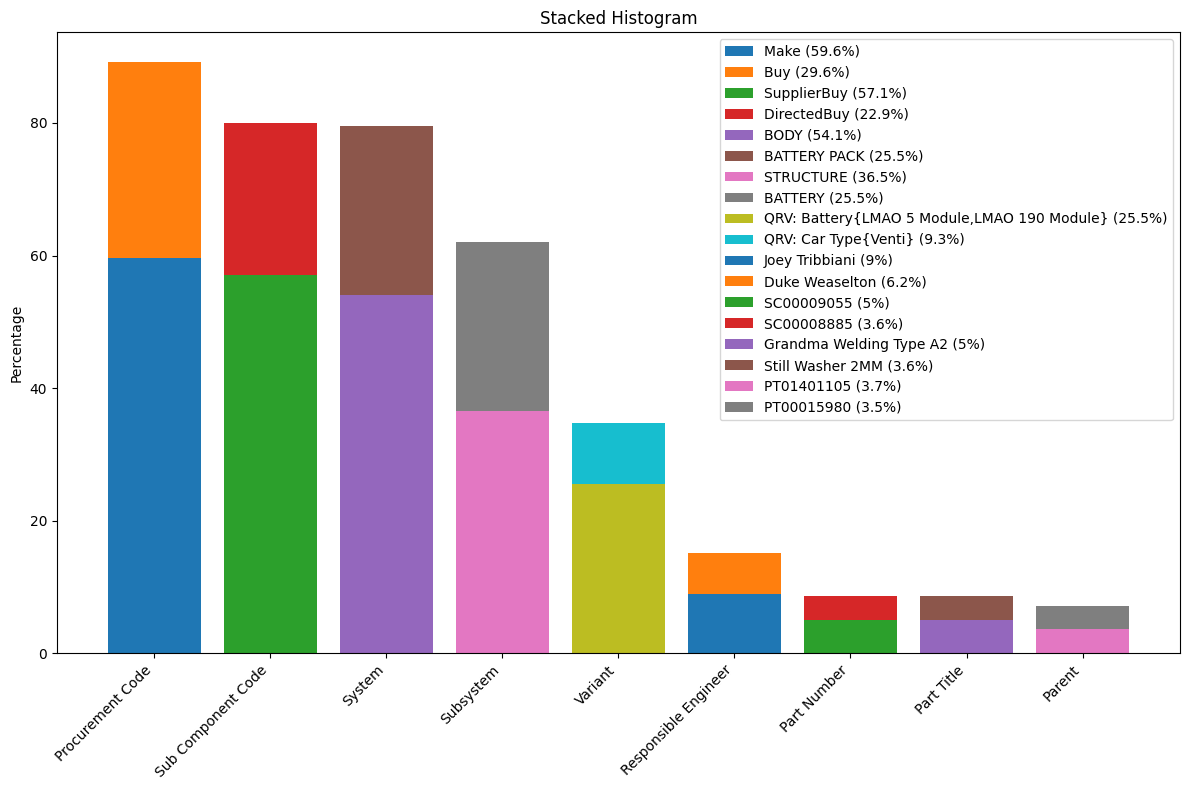

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

other_data = {
    "System": {"BODY": 54.1, "BATTERY PACK": 25.5},
    "Subsystem": {"STRUCTURE": 36.5, "BATTERY": 25.5},
    "Part Number": {"SC00009055": 5, "SC00008885": 3.6},
    "Part Title": {"Grandma Welding Type A2": 5, "Still Washer 2MM": 3.6},
    "Parent": {"PT01401105": 3.7, "PT00015980": 3.5},
    "Responsible Engineer": {"Joey Tribbiani": 9, "Duke Weaselton": 6.2},
    "Procurement Code": {"Make": 59.6, "Buy": 29.6},
    "Sub Component Code": {"SupplierBuy": 57.1, "DirectedBuy": 22.9},
    "Variant": {"QRV: Battery{LMAO 5 Module,LMAO 190 Module}": 25.5, "QRV: Car Type{Venti}": 9.3}
}

sorted_categories = sorted(other_data, key=lambda x: sum(other_data[x].values()), reverse=True)

fig, ax = plt.subplots(figsize=(12, 8))

legend_labels = []
for category in sorted_categories:
    data = other_data[category]
    bottom = 0
    for var, value in data.items():
        bar = ax.bar(category, value, bottom=bottom, label=f"{var} ({value}%)")
        bottom += value
        legend_labels.append((bar[0], f"{var} ({value}%)"))

ax.set_ylabel('Percentage')
ax.set_title('Stacked Histogram')
ax.legend(handles=[label[0] for label in legend_labels], labels=[label[1] for label in legend_labels])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Brandon

# filtered_df = quick_release[(quick_release['Sub Component Code'] == quick_release.iloc[0]["Sub Component Code"])]
# filtered_df

sub_component_code = quick_release.iloc[0]["Sub Component Code"]

# Filter the DataFrame based on the extracted value
filtered_df = quick_release[pd.isnull(quick_release['Sub Component Code'])]
filtered_df

Level                                                Key        System  \
0          1                                         EV00004608          BODY   
1          2                              EV00004608-SY00002272          BODY   
2          3                   EV00004608-SY00002272-SB00007686          BODY   
3          4        EV00004608-SY00002272-SB00007686-GP00005889          BODY   
4          5  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...      ...                                                ...           ...   
69380      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69381      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69382      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69383      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69384      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

       Subsystem  Part Number                     Part Title      Parent  \
0            NaN   EV00004608                     QR Vehicle         NaN   
1            NaN   SY00002272                           BODY  EV00004608   
2      STRUCTURE   SB00007686                      STRUCTURE  SY00002272   
3      STRUCTURE   GP00005889                          SEALS  SB00007686   
4      STRUCTURE  CAY00010323             BODY STORE SEALANT  GP00005889   
...          ...          ...                            ...         ...   
69380    BATTERY   SC00013805                      Foam 607P  PT01597040   
69381    BATTERY   PT01759813  TOUCH COVER; NEGATIVE - LARGE  PT01759805   
69382    BATTERY   PT01759815  TOUCH COVER; POSITIVE - LARGE  PT01759805   
69383    BATTERY   PT00052426              SHEAR WALL; 3BOLT  PT01759805   
69384    BATTERY   PT00052426              SHEAR WALL; 3BOLT  PT01759805   

      Responsible Engineer Procurement Code Sub Component Code  \
0             Rachel Green          Phantom                NaN   
1             Rachel Green          Phantom                NaN   
2             Rachel Green          Phantom                NaN   
3             Rachel Green          Phantom                NaN   
4            Pheobe Buffay          Phantom                NaN   
...                    ...              ...                ...   
69380       Duke Weaselton              Buy                NaN   
69381              Swagman             Make                NaN   
69382              Swagman              Buy                NaN   
69383           Judy Hopps              Buy                NaN   
69384           Judy Hopps              Buy                NaN   

                                           Variant  
0                             QRV: Car Type{Venti}  
1                             QRV: Car Type{Venti}  
2                             QRV: Car Type{Venti}  
3                             QRV: Car Type{Venti}  
4                             QRV: Car Type{Venti}  
...                                            ...  
69380  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69381  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69382  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69383  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69384  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[59833 rows x 11 columns]

In [ ]:
df_11 = _deepnote_execute_sql('-- Brandon\nSELECT DISTINCT Key\nFROM quick_release as qr\nWHERE qr."Sub Component Code" is NULL AND qr."Procurement Code" = \'Buy\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_11

Key
0     EV00004608-SY00002272-SB00007686-GP00005889-CA...
1     EV00004608-SY00002272-SB00007686-GP00005889-CA...
2     EV00004608-SY00002272-SB00007686-GP00005889-CA...
3     EV00004608-SY00002272-SB00007686-GP00005889-CA...
4     EV00004608-SY00002272-SB00007686-GP00005889-CA...
...                                                 ...
6992  EV00004608-SY00005795-SB00003830-GP00009740-SB...
6993  EV00004608-SY00005795-SB00003830-GP00009740-SB...
6994  EV00004608-SY00005795-SB00003830-GP00009740-SB...
6995  EV00004608-SY00005795-SB00003830-GP00009740-SB...
6996  EV00004608-SY00005795-SB00003830-GP00009740-SB...

[6997 rows x 1 columns]

In [ ]:
df_4 = _deepnote_execute_sql('-- Brandon\nSELECT DISTINCT SPLIT_PART(Key, \'-\', -1) AS Last_Element\nFROM quick_release as qr\nWHERE qr."Sub Component Code" is NULL AND qr."Procurement Code" = \'Buy\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_4

Last_Element
0      SC00012818
1      SC00012238
2      PT00021866
3      SC00012823
4      SC00011953
...           ...
2705   PT01403061
2706   PT00483718
2707   PT01597036
2708   PT01709808
2709   PT01759815

[2710 rows x 1 columns]

# Table 

In [ ]:
df_13 = _deepnote_execute_sql('-- Brandon\n-- Assuming each row has accurate Procurement and Sub Component codes, \n-- this is a list of wrong entries \nSELECT *\nFROM quick_release as qr_c\nWHERE qr_c."Parent" NOT IN (\n    SELECT qr_p."Part Number"\n    FROM quick_release as qr_p\n    WHERE qr_p."Sub Component Code" IS NULL AND qr_p."Procurement Code" = \'Buy\') AND \n    ((qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'Consignment\') OR \n    (qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'DirectedBuy\') OR \n    (qr_c."Procurement Code" = \'Buy\' AND qr_c."Sub Component Code" = \'SupplierBuy\') OR \n    (qr_c."Procurement Code" = \'Phantom\' AND qr_c."Sub Component Code" IS NULL));', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_13

Level                                                Key        System  \
0         2                              EV00004608-SY00002272          BODY   
1         3                   EV00004608-SY00002272-SB00007686          BODY   
2         4        EV00004608-SY00002272-SB00007686-GP00005889          BODY   
3         5  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
4         6  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...     ...                                                ...           ...   
5928     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
5929     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
5930     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
5931     11  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
5932     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

      Subsystem  Part Number              Part Title       Parent  \
0          None   SY00002272                    BODY   EV00004608   
1     STRUCTURE   SB00007686               STRUCTURE   SY00002272   
2     STRUCTURE   GP00005889                   SEALS   SB00007686   
3     STRUCTURE  CAY00010323      BODY STORE SEALANT   GP00005889   
4     STRUCTURE   PT00015718  SEALER - UNDERBODY CAB  CAY00010323   
...         ...          ...                     ...          ...   
5928    BATTERY   PT00051315      Sour Patch Gummies   PT00015983   
5929    BATTERY   PT00051311          Motorboat Tail   PT00015975   
5930    BATTERY   PT00051315      Sour Patch Gummies   PT00015983   
5931    BATTERY   PT00051311          Motorboat Tail   PT00015975   
5932    BATTERY   PT00067753     PCB - BTS; ESS; OMG   PT00016063   

     Responsible Engineer Procurement Code Sub Component Code  \
0            Rachel Green          Phantom               None   
1            Rachel Green          Phantom               None   
2            Rachel Green          Phantom               None   
3           Pheobe Buffay          Phantom               None   
4           Pheobe Buffay          Phantom               None   
...                   ...              ...                ...   
5928      Dawn Bellwether              Buy        SupplierBuy   
5929      Dawn Bellwether              Buy        SupplierBuy   
5930      Dawn Bellwether              Buy        SupplierBuy   
5931      Dawn Bellwether              Buy        SupplierBuy   
5932      Brittany Pierce              Buy        SupplierBuy   

                                          Variant  
0                            QRV: Car Type{Venti}  
1                            QRV: Car Type{Venti}  
2                            QRV: Car Type{Venti}  
3                            QRV: Car Type{Venti}  
4                            QRV: Car Type{Venti}  
...                                           ...  
5928  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
5929  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
5930  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
5931  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
5932  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[5933 rows x 11 columns]

In [ ]:
df_17 = _deepnote_execute_sql('-- Brandon\n-- Assuming each row has accurate Procurement and Sub Component codes, \n-- this is a list of wrong entries \nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" NOT IN (\n    SELECT DISTINCT qr."Part Number"\n    FROM quick_release as qr\n    WHERE (qr."Sub Component Code" IS NULL AND qr."Procurement Code" = \'Make\') OR \n    (qr."Sub Component Code" IS NULL AND qr."Procurement Code" = \'Phantom\')) AND \n    ((qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" IS NULL) OR \n    (qr."Procurement Code" = \'Make\' AND qr."Sub Component Code" IS NULL) OR \n    (qr."Procurement Code" = \'Phantom\' AND qr."Sub Component Code" IS NULL));', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_17

Level                                                Key        System  \
0         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
1         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
2         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
3         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
4         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...     ...                                                ...           ...   
4176      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
4177      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
4178      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
4179      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
4180      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

      Subsystem Part Number  \
0     STRUCTURE  SC00012818   
1     STRUCTURE  SC00012818   
2     STRUCTURE  SC00012818   
3     STRUCTURE  SC00012818   
4     STRUCTURE  SC00012818   
...         ...         ...   
4176    BATTERY  PT00089670   
4177    BATTERY  PT00056246   
4178    BATTERY  SC00010831   
4179    BATTERY  SC00010831   
4180    BATTERY  SC00010831   

                                             Part Title      Parent  \
0                                 Adhesive Paste Type G  PT00021866   
1                                 Adhesive Paste Type G  PT00021866   
2                                 Adhesive Paste Type G  PT00021866   
3                                 Adhesive Paste Type G  PT00021866   
4                                 Adhesive Paste Type G  PT00021866   
...                                                 ...         ...   
4176  LABEL - PRODUCT MARKING; PRINT ON DEMAND; 0.62...  PT00022780   
4177            CONNECTOR; THERMISTOR HARNESS; MOLECULE  PT00056245   
4178                                  Adhesive Type K32  PT00094535   
4179                                  Adhesive Type K32  PT00094535   
4180                                  Adhesive Type K32  PT00094536   

     Responsible Engineer Procurement Code Sub Component Code  \
0             Ross Geller              Buy               None   
1             Ross Geller              Buy               None   
2             Ross Geller              Buy               None   
3             Ross Geller              Buy               None   
4             Ross Geller              Buy               None   
...                   ...              ...                ...   
4176       Mercedes Jones              Buy               None   
4177          Jack Horner              Buy               None   
4178       Duke Weaselton              Buy               None   
4179       Duke Weaselton              Buy               None   
4180       Duke Weaselton              Buy               None   

                                          Variant  
0                            QRV: Car Type{Venti}  
1                            QRV: Car Type{Venti}  
2                            QRV: Car Type{Venti}  
3                            QRV: Car Type{Venti}  
4                            QRV: Car Type{Venti}  
...                                           ...  
4176  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
4177  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
4178  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
4179  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
4180  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[4181 rows x 11 columns]

In [ ]:
df_18 = _deepnote_execute_sql('-- Brandon\n-- Assuming each row has accurate Procurement and Sub Component codes, \n-- this is a list of wrong entries \nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" NOT IN (\n    SELECT DISTINCT qr."Part Number"\n    FROM quick_release as qr\n    WHERE qr."Sub Component Code" = \'DirectedBuy\' AND qr."Procurement Code" = \'Buy\' OR \n    qr."Sub Component Code" = \'Consignment\' AND qr."Procurement Code" = \'Buy\') AND \n    ((qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'DirectedBuy\') OR \n    (qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'SupplierBuy\') OR \n    (qr."Procurement Code" = \'Phantom\' AND qr."Sub Component Code" IS NULL));\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_18

Level                                                Key        System  \
0          2                              EV00004608-SY00002272          BODY   
1          3                   EV00004608-SY00002272-SB00007686          BODY   
2          4        EV00004608-SY00002272-SB00007686-GP00005889          BODY   
3          5  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
4          6  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...      ...                                                ...           ...   
11316     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
11317     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
11318     10  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
11319      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
11320      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

       Subsystem  Part Number                    Part Title       Parent  \
0           None   SY00002272                          BODY   EV00004608   
1      STRUCTURE   SB00007686                     STRUCTURE   SY00002272   
2      STRUCTURE   GP00005889                         SEALS   SB00007686   
3      STRUCTURE  CAY00010323            BODY STORE SEALANT   GP00005889   
4      STRUCTURE   PT00015718        SEALER - UNDERBODY CAB  CAY00010323   
...          ...          ...                           ...          ...   
11316    BATTERY   PT00015978     Panic at the Disco Button   PT00066203   
11317    BATTERY   PT00066345          Smoosh the Red Panda   PT00066203   
11318    BATTERY   PT00072516  RIBBON - VOLTAGE SENSE 6S72P   PT00066203   
11319    BATTERY   PT00056248           THERMISTOR; SNAP-IN   PT00056245   
11320    BATTERY   PT00056248           THERMISTOR; SNAP-IN   PT00056245   

      Responsible Engineer Procurement Code Sub Component Code  \
0             Rachel Green          Phantom               None   
1             Rachel Green          Phantom               None   
2             Rachel Green          Phantom               None   
3            Pheobe Buffay          Phantom               None   
4            Pheobe Buffay          Phantom               None   
...                    ...              ...                ...   
11316      Petr the Antetr              Buy        SupplierBuy   
11317      Petr the Antetr              Buy        SupplierBuy   
11318      Petr the Antetr              Buy        SupplierBuy   
11319       Will Schuester              Buy        SupplierBuy   
11320       Will Schuester              Buy        SupplierBuy   

                                           Variant  
0                             QRV: Car Type{Venti}  
1                             QRV: Car Type{Venti}  
2                             QRV: Car Type{Venti}  
3                             QRV: Car Type{Venti}  
4                             QRV: Car Type{Venti}  
...                                            ...  
11316  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
11317  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
11318  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
11319  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
11320  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[11321 rows x 11 columns]

In [ ]:
df_20 = _deepnote_execute_sql('-- Brandon\n-- Assuming each row has accurate Procurement and Sub Component codes, \n-- this is a list of wrong entries \nSELECT *\nFROM quick_release as qr\nWHERE qr."Parent" NOT IN (\n    SELECT DISTINCT qr."Part Number"\n    FROM quick_release as qr\n    WHERE qr."Sub Component Code" = \'SupplierBuy\' AND qr."Procurement Code" = \'Buy\') AND \n    ((qr."Procurement Code" = \'Buy\' AND qr."Sub Component Code" = \'SupplierBuy\') OR \n    (qr."Procurement Code" = \'Phantom\' AND qr."Sub Component Code" IS NULL));\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_20

Level                                                Key        System  \
0         2                              EV00004608-SY00002272          BODY   
1         3                   EV00004608-SY00002272-SB00007686          BODY   
2         4        EV00004608-SY00002272-SB00007686-GP00005889          BODY   
3         5  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
4         6  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...     ...                                                ...           ...   
8191      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
8192      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
8193      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
8194      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
8195      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

      Subsystem  Part Number                            Part Title  \
0          None   SY00002272                                  BODY   
1     STRUCTURE   SB00007686                             STRUCTURE   
2     STRUCTURE   GP00005889                                 SEALS   
3     STRUCTURE  CAY00010323                    BODY STORE SEALANT   
4     STRUCTURE   PT00015718                SEALER - UNDERBODY CAB   
...         ...          ...                                   ...   
8191    BATTERY   PT01597041    GUMMY - COLD PLATE TO SUBMOLECULES   
8192    BATTERY   PT00094538     GUMMY - ISOJOINT TO MOLECULE - D1   
8193    BATTERY   PT00094540        GUMMY; SHEAR WALLS TO MOLECULE   
8194    BATTERY   PT00095490  WELDS; BUSBARS TO CURRENT COLLECTORS   
8195    BATTERY   PT01597040                               POTTING   

           Parent Responsible Engineer Procurement Code Sub Component Code  \
0      EV00004608         Rachel Green          Phantom               None   
1      SY00002272         Rachel Green          Phantom               None   
2      SB00007686         Rachel Green          Phantom               None   
3      GP00005889        Pheobe Buffay          Phantom               None   
4     CAY00010323        Pheobe Buffay          Phantom               None   
...           ...                  ...              ...                ...   
8191   PT01759805       Duke Weaselton          Phantom               None   
8192   PT01759805       Duke Weaselton          Phantom               None   
8193   PT01759805            Papa Bear          Phantom               None   
8194   PT01759805           Nick Wilde          Phantom               None   
8195   PT01759805       Duke Weaselton          Phantom               None   

                                          Variant  
0                            QRV: Car Type{Venti}  
1                            QRV: Car Type{Venti}  
2                            QRV: Car Type{Venti}  
3                            QRV: Car Type{Venti}  
4                            QRV: Car Type{Venti}  
...                                           ...  
8191  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
8192  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
8193  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
8194  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
8195  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[8196 rows x 11 columns]

In [ ]:
df_21 = _deepnote_execute_sql('--Brandon\n-- Check if Part # is same as last element in key\n-- GOOD\nSELECT * \nFROM quick_release as qr\nWHERE qr."Part Number" != SPLIT_PART(qr.Key, \'-\', -1)', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_21

Empty DataFrame
Columns: [Level, Key, System, Subsystem, Part Number, Part Title, Parent, Responsible Engineer, Procurement Code, Sub Component Code, Variant]
Index: []

In [ ]:
df_6 = _deepnote_execute_sql('-- Brandon\nSELECT DISTINCT "Sub Component Code"\nFROM quick_release as qr;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_6

Sub Component Code
0               None
1        SupplierBuy
2        DirectedBuy
3         ServiceBuy
4        Consignment
5        SubContract

In [ ]:
df_7 = _deepnote_execute_sql('-- Peter\nSELECT DISTINCT "Procurement Code"\nFROM quick_release as qr;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_7

Procurement Code
0          Phantom
1              Buy
2             Make
3             None

In [ ]:
#buy
char = quick_release['Sub Component Code'].iloc[0]

filtered_data = quick_release[(quick_release['Procurement Code'] == 'Buy') & 
                              (~quick_release['Sub Component Code'].isin(['SupplierBuy', 'DirectedBuy', 'ServiceBuy', 'Consignment', 'SubContract']))]
filtered_data



Level                                                Key        System  \
7          8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
8          8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
9          8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
10         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
11         8  EV00004608-SY00002272-SB00007686-GP00005889-CA...          BODY   
...      ...                                                ...           ...   
69379      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69380      9  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69382      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69383      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   
69384      8  EV00004608-SY00005795-SB00003830-GP00009740-SB...  BATTERY PACK   

       Subsystem Part Number                     Part Title      Parent  \
7      STRUCTURE  SC00012818          Adhesive Paste Type G  PT00023597   
8      STRUCTURE  SC00012818          Adhesive Paste Type G  PT00023597   
9      STRUCTURE  SC00012818          Adhesive Paste Type G  PT00023597   
10     STRUCTURE  SC00012818          Adhesive Paste Type G  PT00023597   
11     STRUCTURE  SC00012818          Adhesive Paste Type G  PT00023597   
...          ...         ...                            ...         ...   
69379    BATTERY  SC00013805                      Foam 607P  PT01597040   
69380    BATTERY  SC00013805                      Foam 607P  PT01597040   
69382    BATTERY  PT01759815  TOUCH COVER; POSITIVE - LARGE  PT01759805   
69383    BATTERY  PT00052426              SHEAR WALL; 3BOLT  PT01759805   
69384    BATTERY  PT00052426              SHEAR WALL; 3BOLT  PT01759805   

      Responsible Engineer Procurement Code Sub Component Code  \
7              Ross Geller              Buy                NaN   
8              Ross Geller              Buy                NaN   
9              Ross Geller              Buy                NaN   
10             Ross Geller              Buy                NaN   
11             Ross Geller              Buy                NaN   
...                    ...              ...                ...   
69379       Duke Weaselton              Buy                NaN   
69380       Duke Weaselton              Buy                NaN   
69382              Swagman              Buy                NaN   
69383           Judy Hopps              Buy                NaN   
69384           Judy Hopps              Buy                NaN   

                                           Variant  
7                             QRV: Car Type{Venti}  
8                             QRV: Car Type{Venti}  
9                             QRV: Car Type{Venti}  
10                            QRV: Car Type{Venti}  
11                            QRV: Car Type{Venti}  
...                                            ...  
69379  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69380  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69382  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69383  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  
69384  QRV: Battery{LMAO 5 Module,LMAO 190 Module}  

[52875 rows x 11 columns]

In [ ]:
df_22 = _deepnote_execute_sql('-- Louis \n-- Check if parent is correct\nSELECT COUNT(*)\nFROM  (SELECT SPLIT_PART(Key, \'-\', -2) AS parent\n        FROM quick_release as qr\n        WHERE parent == qr.Parent)\nUNION ALL \nSELECT COUNT(*) - 1 -- No parent for first one\nFROM quick_release\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_22

count_star()
0         69384
1         69384

In [ ]:
df_23 = _deepnote_execute_sql('-- Louis \n-- Check if part number (child) is correct\nSELECT COUNT(*)\nFROM  (SELECT SPLIT_PART(Key, \'-\', -1) AS child\n        FROM quick_release as qr\n        WHERE child == qr."Part Number")\nUNION ALL \nSELECT COUNT(*)\nFROM quick_release\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_23

count_star()
0         69385
1         69385

In [ ]:
from treelib 
quick_release_sorted = quick_release.sort_values(by='Level')
quick_release_sorted

SyntaxError: invalid syntax (1902032581.py, line 1)

In [ ]:
class TreeNode:
    def __init__(self, data, level):
        self.data = data
        self.level = level
        self.counter = 0
        self.children = []
        self.parent = None
    
    def add_child(self, child, parent):
        self.parent = parent
        self.children.append(child)
    
    def print_tree(self):
        print(self.data)
        if self.children:
            for child in self.children:
                child.print_tree()




In [ ]:

tree = TreeNode('EV00004608', 1)

for i in range(2, 3):
    d = defaultdict(int)
    
    parent_df = quick_release[quick_release['Level'] == i-1]
    child_df = quick_release[quick_release['Level'] == i]
    part_num = check_valid(parent_df, child_df)

    for key, val in part_num.items():
        for j in val:
            d[j] += 1
            if d[j] == 1:
                tree.create_node(i, j.lower(), parent = key.lower())

tree.show()

AttributeError: 'float' object has no attribute 'isqual'

1 2
2 3
3 4
4 5


In [ ]:
df_27 = _deepnote_execute_sql('SELECT COUNT(*)\nFROM quick_release qr\nWHERE qr."Sub Component Code" IS NULL', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_27

count_star()
0         59833

In [ ]:
# import sys
# from treelib import Tree

# tree = Tree()
# tree.create_node('EV00004608', 'EV00004608'.lower())

# for i in range(2, 3):
#     d = defaultdict(int)
    
#     parent_df = quick_release[quick_release['Level'] == i-1]
#     child_df = quick_release[quick_release['Level'] == i]
#     part_num = check_valid(parent_df, child_df)

#     for key, val in part_num.items():
#         for j in val:
#             d[j] += 1
#             if d[j] == 1:
#                 tree.create_node(j, j.lower(), parent=key.lower())

# # Redirect the output to a file-like object
# stdout_backup = sys.stdout
# output_captured = []

# class OutputCapture:
#     def write(self, msg):
#         output_captured.append(msg)

# sys.stdout = OutputCapture()

# # Show the tree
# tree.show(line_type='ascii', file=sys.stdout)

# # Restore the original stdout
# sys.stdout = stdout_backup

# # Print each line separately
# for line in output_captured:
#     print(line.strip())  # Strip to remove trailing newline characters


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
def dfs_count_paths(tree, node, count):
    if not tree.children(node.identifier):  # If it's a leaf node
        return 1  # Return 1 to indicate that a path has been found

    path_count = 0
    for child in tree.children(node.identifier):
        path_count += dfs_count_paths(tree, child, count)

    return path_count

def count_all_paths(tree):
    root = tree.get_node(tree.root)
    return dfs_count_paths(tree, root, count=0)

# Assuming 'tree' is already constructed and populated
num_paths = count_all_paths(tree)
print("Number of all possible paths:", num_paths)


Number of all possible paths: 10336


In [ ]:
print(1- (10336/69385) )

0.8510340851769114


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7447dbe6-84be-48bb-8286-f6424a9fb4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>